<a href="https://colab.research.google.com/github/cfong32/key-sentence-extraction/blob/main/exp13_section4_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q datasets rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.6 MB/s eta 0:00:00


In [ ]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datasets import load_dataset
from spacy.lang.en import English
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from rouge_score.rouge_scorer import RougeScorer
from itertools import cycle
from functools import partial
from textwrap import wrap
from IPython.display import HTML as html_print
pd.set_option('display.min_rows', 4)
sns.set_style("white")
tqdm.pandas()
tqdm = partial(tqdm, position=0, leave=True)
Ks = [1, 5, 10, 20, 40, 60, 80, 100]

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Download pre-computed dataframes

In [ ]:
# the final df can be downloaded here
!wget -O exp10.230306.0052.dfpkl https://uoguelphca-my.sharepoint.com/:u:/g/personal/chungyan_uoguelph_ca/EV2S6ye9OzhFkwjCTQduqVoBP_AWKJ2i44Meg0edT6CVxA?download=1
df = pd.read_pickle('exp10.230306.0052.dfpkl')
df

--2023-03-14 20:08:46--  https://uoguelphca-my.sharepoint.com/:u:/g/personal/chungyan_uoguelph_ca/EV2S6ye9OzhFkwjCTQduqVoBP_AWKJ2i44Meg0edT6CVxA?download=1
Resolving uoguelphca-my.sharepoint.com (uoguelphca-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to uoguelphca-my.sharepoint.com (uoguelphca-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/chungyan_uoguelph_ca/Documents/Shared/exp10.230306.0052.dfpkl?ga=1 [following]
--2023-03-14 20:08:46--  https://uoguelphca-my.sharepoint.com/personal/chungyan_uoguelph_ca/Documents/Shared/exp10.230306.0052.dfpkl?ga=1
Reusing existing connection to uoguelphca-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 141118863 (135M) [application/octet-stream]
Saving to: ‘exp10.230306.0052.dfpkl’

exp10.230306.0052.d 100%[===================>] 134.58M  34.3MB/s    in 3.9s    

2023-03-14 20:08:51 (34.3 MB/s) - ‘exp10.23030

,article,highlights,id,sentences,TFIDF_s2a_sim,ROUGE_s2h_score,SBERT_s2a_sim,SBERT_s2h_sim,rank_by_TFIDF,rank_by_ROUGE,...,GPT_ROUGE_top80%_f1,GPT_GPT_top80%_f1,GPT_SBERT_top80%_f1,TFIDF_GPT_top80%_f1,SBERT_GPT_top80%_f1,GPT_ROUGE_top100%_f1,GPT_GPT_top100%_f1,GPT_SBERT_top100%_f1,TFIDF_GPT_top100%_f1,SBERT_GPT_top100%_f1
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,[(CNN)The Palestinian Authority officially bec...,"[0.394838255251771, 0.2184224416188325, 0.5160...","[0.2877959927140255, 0.11320754716981131, 0.30...","[0.76704454, 0.42279387, 0.7966811, 0.63511753...","[0.6571314, 0.27385426, 0.67717206, 0.7175484,...","[0.6538461538461539, 0.38461538461538464, 1.0,...","[0.8846153846153846, 0.5384615384615384, 0.961...",...,0.857143,0.952381,0.857143,0.904762,0.857143,1.0,1.0,1.0,1.0,1.0
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,"[(CNN)Never mind cats having nine lives., A st...","[0.0910601549035593, 0.29696905043672805, 0.43...","[0.0, 0.29605020302694723, 0.1375008039102193,...","[0.47714734, 0.59764886, 0.6244302, 0.580126, ...","[0.20704053, 0.47492748, 0.71959484, 0.5244162...","[0.0, 0.4444444444444444, 0.8333333333333334, ...","[0.0, 0.9444444444444444, 0.7777777777777778, ...",...,0.866667,0.933333,0.866667,0.933333,0.866667,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488,"Despite the hype surrounding its first watch, ...",Apple sold more than 61 million iPhones in the...,30ec5f280eee772a73d181bfc8514defd8026434,"[Despite the hype surrounding its first watch,...","[0.3847239488347531, 0.20526128662452667, 0.59...","[0.10909090909090909, 0.10758377425044093, 0.3...","[0.6963891, 0.510888, 0.8967398, 0.5488275, 0....","[0.659778, 0.3296187, 0.7385148, 0.39404175, 0...","[0.6956521739130435, 0.2391304347826087, 1.0, ...","[0.6521739130434783, 0.6304347826086957, 0.934...",...,0.837838,0.972973,0.945946,0.945946,0.918919,1.0,1.0,1.0,1.0,1.0
11489,Angus Hawley's brother has spoken of his shock...,Angus Hawley's brother said his late sibling '...,b4a1738c4a0acdf3d189264a0927005aa5b856d6,[Angus Hawley's brother has spoken of his shoc...,"[0.6310895042459086, 0.3007128522327899, 0.187...","[0.24185400655988887, 0.096045197740113, 0.117...","[0.7640883, 0.57733625, 0.5972009, -0.00895412...","[0.7234891, 0.116157815, 0.43206477, -0.050523...","[0.9666666666666667, 0.5333333333333333, 0.35,...","[0.9166666666666666, 0.5833333333333334, 0.716...",...,0.857143,0.938776,0.877551,0.938776,0.857143,1.0,1.0,1.0,1.0,1.0


In [ ]:
# download df_sent (GPT's sentence embeddings)
!wget -O exp7_df_sent.230226.1803.dfpkl https://uoguelphca-my.sharepoint.com/:u:/g/personal/chungyan_uoguelph_ca/ERQRdKRJJ-dEpGMB0lCZkGUBZn69n5UUm4X3lnQoXMtZZw?download=1
df_sent = pd.read_pickle('exp7_df_sent.230226.1803.dfpkl')
display(df_sent)

# save them into a dict
sent_emb_dict = df_sent.set_index('sentence').embedding.to_dict()

--2023-03-14 20:08:53--  https://uoguelphca-my.sharepoint.com/:u:/g/personal/chungyan_uoguelph_ca/ERQRdKRJJ-dEpGMB0lCZkGUBZn69n5UUm4X3lnQoXMtZZw?download=1
Resolving uoguelphca-my.sharepoint.com (uoguelphca-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to uoguelphca-my.sharepoint.com (uoguelphca-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/chungyan_uoguelph_ca/Documents/Shared/exp7_df_sent.230226.1803.dfpkl?ga=1 [following]
--2023-03-14 20:08:53--  https://uoguelphca-my.sharepoint.com/personal/chungyan_uoguelph_ca/Documents/Shared/exp7_df_sent.230226.1803.dfpkl?ga=1
Reusing existing connection to uoguelphca-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 4820777861 (4.5G) [application/octet-stream]
Saving to: ‘exp7_df_sent.230226.1803.dfpkl’

exp7_df_sent.230226 100%[===================>]   4.49G  69.6MB/s    in 75s     

2023-03-14 20:10:09 (61.

,sentence,embedding
0,(CNN)The Palestinian Authority officially beca...,"[-0.0017101807752624154, -0.012141488492488861..."
1,The formal accession was marked with a ceremon...,"[0.007933792658150196, -0.010312643833458424, ..."
...,...,...
387370,Daily Mail Australia has contacted the Kidman ...,"[-0.022104516625404358, -0.010163666680455208,..."
387371,"Tribute: A good friend of Mr Hawley, Merivale ...","[-0.025303861126303673, -0.0009077293798327446..."


In [ ]:
# download df_art (GPT's article and hightlights embeddings)
!wget -O exp7_df_art.230226.2119.dfpkl https://uoguelphca-my.sharepoint.com/:u:/g/personal/chungyan_uoguelph_ca/Eav35id_qPpKmDNf7hMMehYBcecJsI8W0dWFjTZdxT34UA?download=1
df_art = pd.read_pickle('exp7_df_art.230226.2119.dfpkl')
display(df_art)

# save them into a dict
art_emb_dict  = df_art.set_index('article').article_emb.to_dict()
hl_emb_dict   = df_art.set_index('highlights').highlights_emb.to_dict()

--2023-03-14 20:10:19--  https://uoguelphca-my.sharepoint.com/:u:/g/personal/chungyan_uoguelph_ca/Eav35id_qPpKmDNf7hMMehYBcecJsI8W0dWFjTZdxT34UA?download=1
Resolving uoguelphca-my.sharepoint.com (uoguelphca-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to uoguelphca-my.sharepoint.com (uoguelphca-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/chungyan_uoguelph_ca/Documents/Shared/exp7_df_art.230226.2119.dfpkl?ga=1 [following]
--2023-03-14 20:10:19--  https://uoguelphca-my.sharepoint.com/personal/chungyan_uoguelph_ca/Documents/Shared/exp7_df_art.230226.2119.dfpkl?ga=1
Reusing existing connection to uoguelphca-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 379829129 (362M) [application/octet-stream]
Saving to: ‘exp7_df_art.230226.2119.dfpkl’

exp7_df_art.230226. 100%[===================>] 362.23M  79.4MB/s    in 6.3s    

2023-03-14 20:10:26 (57.1 MB

,article,highlights,id,sentences,article_emb,highlights_emb
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,[(CNN)The Palestinian Authority officially bec...,"[-0.0005382943199947476, -0.004374864976853132...","[0.007540947292000055, -0.019479140639305115, ..."
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,"[(CNN)Never mind cats having nine lives., A st...","[-0.0026572151109576225, 0.0016707092290744185...","[-0.013608395121991634, -0.010644521564245224,..."
...,...,...,...,...,...,...
11488,"Despite the hype surrounding its first watch, ...",Apple sold more than 61 million iPhones in the...,30ec5f280eee772a73d181bfc8514defd8026434,"[Despite the hype surrounding its first watch,...","[-0.017547674477100372, -0.007072787266224623,...","[-0.010509248822927475, 0.000893479329533875, ..."
11489,Angus Hawley's brother has spoken of his shock...,Angus Hawley's brother said his late sibling '...,b4a1738c4a0acdf3d189264a0927005aa5b856d6,[Angus Hawley's brother has spoken of his shoc...,"[-0.02470867522060871, -0.0030950969085097313,...","[-0.013881632126867771, 0.004332297015935183, ..."


# Plots and Statistics

In [ ]:
print('Average number of sentences per article:')
df.sentences.map(len).mean()

Average number of sentences per article:


33.71383812010444

In [ ]:
print('Number of articles:')
len(df)

Number of articles:


11490

In [ ]:
print('Total number of sentences:')
df.sentences.map(len).sum()

Total number of sentences:


387372

## Take one article as an example

In [ ]:
# sample one article, re-run to sample another
x = df.iloc[3578]
x

article                 This may just be the best photo-bomb ever. An ...
highlights              At Apo Island, this green sea turtle unexpecte...
                                              ...                        
TFIDF_GPT_top100%_f1                                                  1.0
SBERT_GPT_top100%_f1                                                  1.0
Name: 3578, Length: 88, dtype: object

In [ ]:
x.article

"This may just be the best photo-bomb ever. An adorable green sea turtle made quite the unexpected appearance in tourist Diovani de Jesus's group photo. 'We were posing at Apo Island when this sea turtle surfaced to breathe and photo-bombed,' de Jesus wrote on his blog. An adorable green sea turtle pulled off the ultimate photo-bomb, crashing this group photo in the Philippines . The shallow water in Apo Island, Negros Oriental, Philippines is a feeding ground for sea turtles, so spottings aren't uncommon. However, it is rare that one of the endangered animals would come so close - or look so intently into the camera. Posting the photo on Earth Day, de Jesus adds: 'Just like what my friend Genesis said, this is a reminder that humans and creatures like this gentle pawikan can co-exist.' This particular island is one of the world's best known community-managed marine protected areas. The turtles are traditionally found in tropical and subtropical waters, travelling long distances betwee

In [ ]:
# retrieve gpt embeddings of sentences + article
X = [sent_emb_dict[s] for s in x.sentences] + [art_emb_dict[x.article]]
X = np.stack(X)
X.shape

(11, 1536)

In [ ]:
# calculate cross-sentence cossim
cossim = cosine_similarity(X, X)

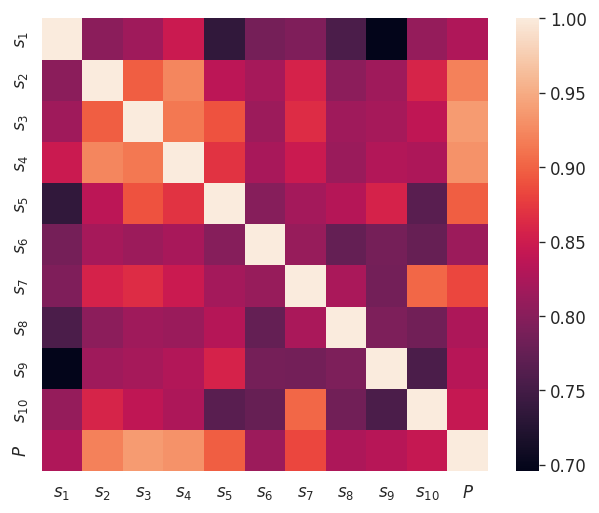

In [ ]:
plt.figure(figsize=(6,5), dpi=120)
sns.heatmap(cossim)
# plt.gca().set_aspect('equal')
plt.xticks([i+0.5 for i in range(len(X))], [f'$s_{{{i+1}}}$' for i in range(len(X)-1)]+['$P$'])
plt.yticks([i+0.5 for i in range(len(X))], [f'$s_{{{i+1}}}$' for i in range(len(X)-1)]+['$P$'])
plt.show()

## Correltation between GPT_sim and ROUGE_score

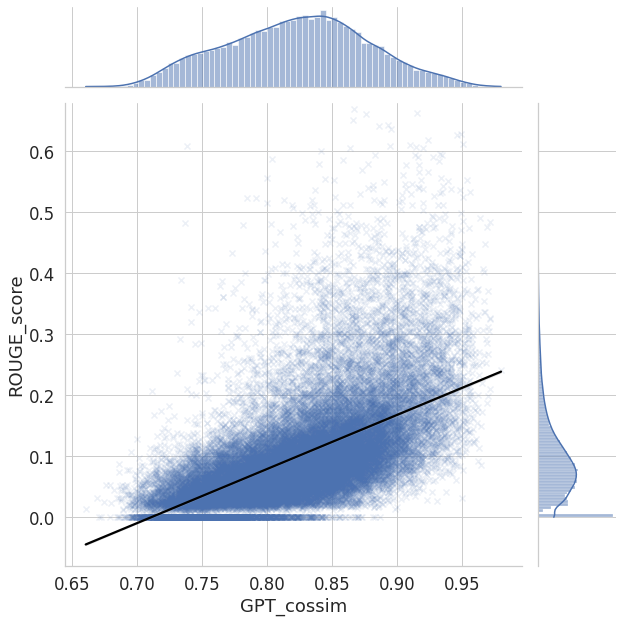

In [ ]:
data = pd.DataFrame({
    'GPT_cossim': df['GPT_s2a_sim'].agg(np.concatenate),
    'ROUGE_score': df['ROUGE_s2h_score'].agg(np.concatenate),
})

sns.set(font_scale=1.5, style='whitegrid')
sns.jointplot(
    data=data.sample(frac=0.1),
    x='GPT_cossim',
    y='ROUGE_score',
    marker='x',
    kind='reg',
    scatter_kws={'alpha': 0.1},
    line_kws={'color': 'black'},
    height=9,
)
plt.ylim(-0.08,0.68)
plt.show()

## Top-K%-sentence F1 scores
Assume that we are to predict the top-K%-sentence using TFIDF_s2a_sim (or GPT_s2a_sim), while ROUGE_s2h_score (or GPT_s2h_sim) is the ground-truth.  E.g., for an article of 20 sentences, "top-10%-sentence" are the most important 2 key-sentences.

In short, here we evaluate if our method can find most importance sentences in each article.

Validated by ROUGE


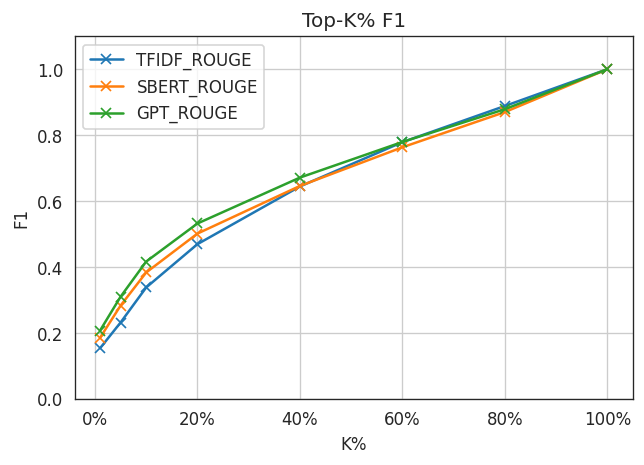

In [ ]:
print('Validated by ROUGE')

plt.figure(figsize=(6,4), dpi=120)

for test_prefix in ['TFIDF_ROUGE', 'SBERT_ROUGE', 'GPT_ROUGE']:
    cols = [f'{test_prefix}_top{K}%_f1'  for K in Ks]
    plt.plot(Ks,
             df[cols].describe().T['mean'].values,
             'x-',
             label=test_prefix)

plt.ylim(0,1.1)
plt.xlabel('K%')
plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel('F1')
plt.title('Top-K% F1')
plt.grid()
plt.legend()
plt.show()

In [ ]:
Ks_subset = [1, 10, 20, 40, 80]
data = {}
# data['K'] = Ks_subset
for test_prefix in ['TFIDF_ROUGE', 'SBERT_ROUGE', 'GPT_ROUGE']:
    cols = [f'{test_prefix}_top{K}%_f1'  for K in Ks_subset]
    key = test_prefix.replace('_ROUGE', '')
    data[key] = df[cols].describe().T['mean'].values

df_out = (
    pd.DataFrame(data=data, index=[f'{K}%' for K in Ks_subset])
    .rename_axis('K%')
    .round(2)
    .T
)
df_out

K%,1%,10%,20%,40%,80%
TFIDF,0.15,0.34,0.47,0.64,0.89
SBERT,0.18,0.38,0.50,0.65,0.87
GPT,0.21,0.42,0.53,0.67,0.88


In [ ]:
print(df_out.to_latex())

\begin{tabular}{lrrrrr}
\toprule
K\% &    1\% &   10\% &   20\% &   40\% &   80\% \\
\midrule
TFIDF &  0.15 &  0.34 &  0.47 &  0.64 &  0.89 \\
SBERT &  0.18 &  0.38 &  0.50 &  0.65 &  0.87 \\
GPT   &  0.21 &  0.42 &  0.53 &  0.67 &  0.88 \\
\bottomrule
\end{tabular}

